In [43]:
import pandas as pd
import os

# Define the paths to the JSON files (local paths)
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
train_file_path = os.path.join(current_dir, 'old_datasets', 'codeforces_train.jsonl')
test_file_path = os.path.join(current_dir, 'old_datasets', 'codeforces_test.jsonl')
val_file_path = os.path.join(current_dir, 'old_datasets', 'codeforces_val.jsonl')

# Load the JSON files into pandas DataFrames
try:
    train_df = pd.read_json(train_file_path, lines=True)
    test_df = pd.read_json(test_file_path, lines=True)
    val_df = pd.read_json(val_file_path, lines=True)
    
    # Append validation dataset to training dataset
    train_df = pd.concat([train_df, val_df], ignore_index=True)
    
    print("Datasets loaded successfully!")
    print("Train dataset head (after appending validation):")
    display(train_df.head()) # Display the first few rows of the train DataFrame
    print("\nTest dataset head:")
    display(test_df.head()) # Display the first few rows of the test DataFrame
except FileNotFoundError:
    print(f"Error: One of the files was not found. Please check the paths.")
    print(f"Looking for files in: {current_dir}")
except Exception as e:
    print(f"An error occurred while loading the files: {e}")

Datasets loaded successfully!
Train dataset head (after appending validation):


,statement,greedy,math,implementation,dp,constructive algorithms,data structures,brute force,binary search,sortings,graphs,problem_dificulty,problem_editorial
0,You must have heard of the two brothers dreaming of ruling the world With all their previous pla...,1,0,0,1,0,0,0,0,0,0,2100,Consider we only want to change direction of minimum number of roads so that all other countries...
1,In a medieval kingdom the economic crisis is raging Milk drops fall Economic indicators are dete...,1,0,0,0,0,0,0,0,0,1,2500,Consider bipartite graph in which princesses are in the left part and princes in the right part ...
2,There are cities located along the one way road Cities are numbered from to in the direction of ...,1,0,0,1,0,0,0,0,0,0,2900,Build a network of the following form The network will consist of vertices the source located at...
3,You are given an array of n positive integers a 1 dots a n and a possibly negative integer c Acr...,1,1,0,0,1,0,1,0,0,0,2600,Let the of a permutation of be the value When it can be proven that the minimum cost can be obta...
4,n people gathered to hold a jury meeting of the upcoming competition the i th member of the jury...,0,1,0,0,0,0,0,0,0,0,1500,Note that if there are at least two members with the maximum value of then any permutation is ni...



Test dataset head:


,statement,greedy,math,implementation,dp,constructive algorithms,data structures,brute force,binary search,sortings,graphs,problem_dificulty,problem_editorial
0,You are given an integer n Check if n has an divisor greater than one does there exist such a nu...,0,1,0,0,0,0,0,0,0,0,900,If the number has an odd divisor then it has an odd prime divisor To understand this fact we can...
1,You are given an array a of 2n integers You want to arrange the elements of the array in a circl...,0,0,0,0,1,0,0,0,1,0,800,The main idea is that we can split the numbers into the two halves the big half and small half w...
2,Monocarp has just learned a new card trick and can t wait to present it to you He shows you the ...,0,1,1,0,0,0,0,0,0,0,800,The easiest way to solve to problem is probably to see the resemblense of a shuffle operation to...
3,Pak Chanek has n blank heart shaped cards Card 1 is attached directly to the wall while each of ...,1,0,0,1,1,1,0,0,0,0,1800,The cards form a rooted tree with card being the root where for each the parent of card is Let b...
4,You are given a broken clock You know that it is supposed to show time in 12 or 24 hours format ...,0,0,1,0,0,0,1,0,0,0,1300,Let s iterate over all possible values that can be shown on the clock First two digits must form...


In [44]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocesses a text string by converting to lowercase, removing non-alphabetic
    characters, tokenizing, and removing stopwords.
    """
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

train_df['processed_statement'] = train_df['statement'].apply(preprocess_text)
test_df['processed_statement'] = test_df['statement'].apply(preprocess_text)

train_df['processed_editorial'] = train_df['problem_editorial'].apply(preprocess_text)
test_df['processed_editorial'] = test_df['problem_editorial'].apply(preprocess_text)

print("Processed train dataset head:")
display(train_df.head())
print("\nProcessed test dataset head:")
display(test_df.head())

[nltk_data] Downloading package stopwords to /home/luca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed train dataset head:


,statement,greedy,math,implementation,dp,constructive algorithms,data structures,brute force,binary search,sortings,graphs,problem_dificulty,problem_editorial,processed_statement,processed_editorial
0,You must have heard of the two brothers dreaming of ruling the world With all their previous pla...,1,0,0,1,0,0,0,0,0,0,2100,Consider we only want to change direction of minimum number of roads so that all other countries...,"[must, heard, two, brothers, dreaming, ruling, world, previous, plans, failed, time, decided, co...","[consider, want, change, direction, minimum, number, roads, countries, reachable, specific, coun..."
1,In a medieval kingdom the economic crisis is raging Milk drops fall Economic indicators are dete...,1,0,0,0,0,0,0,0,0,1,2500,Consider bipartite graph in which princesses are in the left part and princes in the right part ...,"[medieval, kingdom, economic, crisis, raging, milk, drops, fall, economic, indicators, deteriora...","[consider, bipartite, graph, princesses, left, part, princes, right, part, propriety, transversa..."
2,There are cities located along the one way road Cities are numbered from to in the direction of ...,1,0,0,1,0,0,0,0,0,0,2900,Build a network of the following form The network will consist of vertices the source located at...,"[cities, located, along, one, way, road, cities, numbered, direction, road, th, city, produced, ...","[build, network, following, form, network, consist, vertices, source, located, node, number, sin..."
3,You are given an array of n positive integers a 1 dots a n and a possibly negative integer c Acr...,1,1,0,0,1,0,1,0,0,0,2600,Let the of a permutation of be the value When it can be proven that the minimum cost can be obta...,"[given, array, n, positive, integers, dots, n, possibly, negative, integer, c, across, permutati...","[let, permutation, value, proven, minimum, cost, obtained, sorting, nondecreasing, order, sortin..."
4,n people gathered to hold a jury meeting of the upcoming competition the i th member of the jury...,0,1,0,0,0,0,0,0,0,0,1500,Note that if there are at least two members with the maximum value of then any permutation is ni...,"[n, people, gathered, hold, jury, meeting, upcoming, competition, th, member, jury, came, tasks,...","[note, least, two, members, maximum, value, permutation, nice, let, consider, case, one, maximum..."



Processed test dataset head:


,statement,greedy,math,implementation,dp,constructive algorithms,data structures,brute force,binary search,sortings,graphs,problem_dificulty,problem_editorial,processed_statement,processed_editorial
0,You are given an integer n Check if n has an divisor greater than one does there exist such a nu...,0,1,0,0,0,0,0,0,0,0,900,If the number has an odd divisor then it has an odd prime divisor To understand this fact we can...,"[given, integer, n, check, n, divisor, greater, one, exist, number, x, x, n, divisible, x, x, od...","[number, odd, divisor, odd, prime, divisor, understand, fact, consider, happens, multiplying, ev..."
1,You are given an array a of 2n integers You want to arrange the elements of the array in a circl...,0,0,0,0,1,0,0,0,1,0,800,The main idea is that we can split the numbers into the two halves the big half and small half w...,"[given, array, n, integers, want, arrange, elements, array, circle, element, equal, arithmetic, ...","[main, idea, split, numbers, two, halves, big, half, small, half, place, bigger, half, odd, posi..."
2,Monocarp has just learned a new card trick and can t wait to present it to you He shows you the ...,0,1,1,0,0,0,0,0,0,0,800,The easiest way to solve to problem is probably to see the resemblense of a shuffle operation to...,"[monocarp, learned, new, card, trick, wait, present, shows, entire, deck, n, cards, see, values,...","[easiest, way, solve, problem, probably, see, resemblense, shuffle, operation, std, rotate, func..."
3,Pak Chanek has n blank heart shaped cards Card 1 is attached directly to the wall while each of ...,1,0,0,1,1,1,0,0,0,0,1800,The cards form a rooted tree with card being the root where for each the parent of card is Let b...,"[pak, chanek, n, blank, heart, shaped, cards, card, attached, directly, wall, cards, hanging, on...","[cards, form, rooted, tree, card, root, parent, card, let, number, card, get, removed, remove, c..."
4,You are given a broken clock You know that it is supposed to show time in 12 or 24 hours format ...,0,0,1,0,0,0,1,0,0,0,1300,Let s iterate over all possible values that can be shown on the clock First two digits must form...,"[given, broken, clock, know, supposed, show, time, hours, format, hours, format, hours, change, ...","[let, iterate, possible, values, shown, clock, first, two, digits, must, form, number, case, hou..."


In [45]:
from gensim.models import Word2Vec

# Combine processed statements and editorials from both train and test datasets
corpus = (
    train_df['processed_statement'].tolist() + 
    train_df['processed_editorial'].tolist() + 
    test_df['processed_statement'].tolist() + 
    test_df['processed_editorial'].tolist()
)

print(f"Total number of documents (statements + editorials): {len(corpus)}")
print(f"Sample document length: {len(corpus[0]) if corpus else 0}")

# Instantiate and train the Word2Vec model
vector_size = 50
window = 5
min_count = 1
workers = 4

w2vmodel = Word2Vec(sentences=corpus, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

# Train the model
total_examples = w2vmodel.corpus_count
epochs = 10
w2vmodel.train(corpus, total_examples=total_examples, epochs=epochs)

# Save the model
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
model_filename = 'word2vec_model.bin'
model_path = os.path.join(current_dir, model_filename)
w2vmodel.save(model_path)

print(f"Word2Vec model trained successfully!")
print(f"Vocabulary size: {len(w2vmodel.wv.key_to_index)}")
print(f"Model saved to: {model_path}")

Total number of documents (statements + editorials): 13802
Sample document length: 76
Word2Vec model trained successfully!
Vocabulary size: 18930
Model saved to: /home/luca/Carleton/CS/NLP/FinalProject/LSTM/word2vec_model.bin


In [46]:
test_word = "tree"
print(f"Most similar to '{test_word}' {w2vmodel.wv.most_similar(test_word)}")
# tree is a great word to test the quality of the embedding, it makes a lot of sense that it is close to
# centroid decomposition, root, subtree, trie, depth, specially after training on the editorials as well (those are all terms used either in solutions
# to tree problems or standard terminology when discussing problems on trees).


Most similar to 'tree' [('trees', 0.7024281024932861), ('subtree', 0.6738408207893372), ('rooted', 0.6529191136360168), ('root', 0.6475535035133362), ('centroid', 0.6410536170005798), ('leaf', 0.6063424944877625), ('leafs', 0.5785777568817139), ('trie', 0.5785271525382996), ('ibti', 0.5570788383483887), ('ancestors', 0.5552295446395874)]


In [13]:
import os
from gensim.models import Word2Vec

# Load the Word2Vec model from local path
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
model_filename = 'word2vec_model.bin'
model_path = os.path.join(current_dir, model_filename)

w2vmodel = Word2Vec.load(model_path)

In [47]:
# Get the size of the vocabulary
vocab_size = len(w2vmodel.wv.key_to_index)

print(f"The size of the vocabulary is: {vocab_size}")

The size of the vocabulary is: 18930


In [78]:
import torch

def get_tokens_indices(tokens, key_to_index, vocab_size):
    """
    Converts a list of tokens into a sequence of one-hot encoded vectors.
    Skips words not present in the model's vocabulary.
    """
    tokens_indices = [key_to_index[word] for word in tokens]
    return tokens_indices

# Apply the function to create embedding sequences
# Concatenate processed_statement and processed_editorial
key_to_index = w2vmodel.wv.key_to_index
vocab_size = len(key_to_index) # Get the vocabulary size
train_df['embedding_sequence'] = train_df.apply(lambda row: get_tokens_indices(row['processed_statement'] + row['processed_editorial'], key_to_index, vocab_size), axis=1)
test_df['embedding_sequence'] = test_df.apply(lambda row: get_tokens_indices(row['processed_statement'] + row['processed_editorial'], key_to_index, vocab_size), axis=1)

# Define the target columns (excluding text columns and processed columns)
# Only include the tag columns (greedy, math, implementation, etc.) which are binary (0/1)
exclude_columns = ['statement', 'processed_statement', 'embedding_sequence', 
                   'problem_editorial', 'problem_dificulty', 'processed_editorial']
target_columns = [col for col in train_df.columns if col not in exclude_columns]

# Convert target variables to PyTorch tensors
train_target_tensors = torch.tensor(train_df[target_columns].values, dtype=torch.float32)
test_target_tensors = torch.tensor(test_df[target_columns].values, dtype=torch.float32)

print("\nTrain target tensors shape:", train_target_tensors.shape)
print("Test target tensors shape:", test_target_tensors.shape)


Train target tensors shape: torch.Size([5512, 10])
Test target tensors shape: torch.Size([1389, 10])


In [81]:
# Define the maximum sequence length observed in the previous run for padding
MAX_SEQUENCE_LENGTH = 100000
MIN_SEQUENCE_LENGTH = 5

# Filter out sequences longer than MAX_SEQUENCE_LENGTH for both train and test dataframes
train_df_usable = train_df[(train_df['embedding_sequence'].apply(len) <= MAX_SEQUENCE_LENGTH) & (train_df['embedding_sequence'].apply(len) >= MIN_SEQUENCE_LENGTH)]
test_df_usable = test_df[(test_df['embedding_sequence'].apply(len) <= MAX_SEQUENCE_LENGTH) & (test_df['embedding_sequence'].apply(len) >= MIN_SEQUENCE_LENGTH)]

# Prepare data for training
X_train = train_df_usable['embedding_sequence'].tolist()
y_train = torch.tensor(train_df_usable[target_columns].values, dtype=torch.float32)

# Prepare data for testing
X_test = test_df_usable['embedding_sequence'].tolist()
y_test = torch.tensor(test_df_usable[target_columns].values, dtype=torch.float32)

print("Training set created successfully!")
print(f"X_train size: {len(X_train)}")
print(f"y_train shape: {y_train.shape}")
print("\nTest set created successfully!")
print(f"X_test size: {len(X_test)}")
print(f"y_test shape: {y_test.shape}")

Training set created successfully!
X_train size: 5512
y_train shape: torch.Size([5512, 10])

Test set created successfully!
X_test size: 1389
y_test shape: torch.Size([1389, 10])


In [95]:
import torch.nn as nn
import numpy as np

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx, w2v_weights):
        """
        Args:
            vocab_size: Size of vocabulary (without padding)
            embedding_dim: Dimension of word embeddings
            hidden_dim: Number of hidden units in LSTM (16)
            output_dim: Output dimension (10)
            padding_idx: Index used for padding (vocab_size)
            w2v_weights: Pre-trained word2vec weights matrix
        """
        super(LSTMModel, self).__init__()
        
        # Create embedding weights tensor: word2vec weights + padding vector (zeros)
        # Convert word2vec weights to tensor
        w2v_tensor = torch.tensor(w2v_weights, dtype=torch.float32)
        # # Create padding vector (zeros) for the padding token
        # padding_vector = torch.zeros(1, embedding_dim, dtype=torch.float32)
        # # Concatenate word2vec weights with padding vector
        # embedding_weights = torch.cat([w2v_tensor, padding_vector], dim=0)
        
        # Create embedding layer using from_pretrained
        # padding_idx is vocab_size (the last index)
        self.embedding = nn.Embedding.from_pretrained(
            w2v_tensor, 
            freeze=False,  # Allow fine-tuning during training
            # padding_idx=padding_idx
        )
        
        # LSTM layer with 16 hidden units
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        
        # Fully connected layer to transform LSTM output to 10 dimensions
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        # Sigmoid activation
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        """
        Args:
            x: Padded tensor of shape (batch_size, seq_len) with indices
        Returns:
            Output tensor of shape (batch_size, 10) after sigmoid
        """
        # Embedding: (batch_size, seq_len) -> (batch_size, seq_len, embedding_dim)
        embedded = self.embedding(x)
        
        # LSTM: (batch_size, seq_len, embedding_dim) -> (batch_size, seq_len, hidden_dim)
        lstm_out, (hidden, cell) = self.lstm(embedded)
        
        # Use the last hidden state: (batch_size, hidden_dim)
        # lstm_out[:, -1, :] takes the last timestep output
        last_hidden = lstm_out[:, -1, :]
        
        # print(last_hidden)

        # Fully connected layer: (batch_size, hidden_dim) -> (batch_size, output_dim)
        fc_out = self.fc(last_hidden)
        
        # Sigmoid activation: (batch_size, output_dim) -> (batch_size, output_dim)
        output = self.sigmoid(fc_out)
        
        return output

# Get word2vec embedding dimension
embedding_dim = w2vmodel.wv.vector_size
print(f"Word2Vec embedding dimension: {embedding_dim}")

# Get word2vec weights matrix
w2v_weights = w2vmodel.wv.vectors  # Shape: (vocab_size, embedding_dim)

# Create the model
model = LSTMModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=16,
    output_dim=10,
    padding_idx=vocab_size,
    w2v_weights=w2v_weights
)

print(f"\nModel created successfully!")
print(f"Model architecture:")
print(model)


Word2Vec embedding dimension: 50

Model created successfully!
Model architecture:
LSTMModel(
  (embedding): Embedding(18930, 50)
  (lstm): LSTM(50, 16, batch_first=True)
  (fc): Linear(in_features=16, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)


In [96]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
from collections import defaultdict
import random

# Custom Dataset class
class SequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = X  # List of sequences
        self.y = y  # Tensor of targets
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Custom collate function that batches sequences of the same length
def collate_by_length(batch):
    """
    Groups samples by sequence length and creates batches.
    All sequences in a batch will have the same length (no padding needed).
    """
    # Separate X and y
    X_batch, y_batch = zip(*batch)
    
    # Convert X to tensors (all sequences in batch have same length, so no padding needed)
    X_batch = [torch.tensor(seq, dtype=torch.long) for seq in X_batch]
    X_batch = torch.stack(X_batch)  # Stack into batch tensor
    
    # Stack y tensors
    y_batch = torch.stack(y_batch)
    
    return X_batch, y_batch

# Custom sampler that groups samples by length
class LengthGroupedSampler:
    """
    Groups samples by sequence length and yields batches of the same length.
    """
    def __init__(self, X, batch_size, shuffle=True):
        self.X = X
        self.batch_size = batch_size
        self.shuffle = shuffle
        
        # Group indices by sequence length
        self.length_groups = defaultdict(list)
        for idx, seq in enumerate(X):
            length = len(seq)
            self.length_groups[length].append(idx)
        
        # Create batches within each length group
        self.batches = []
        for length, indices in self.length_groups.items():
            if self.shuffle:
                random.shuffle(indices)
            
            # Create batches from indices of this length
            for i in range(0, len(indices), batch_size):
                batch_indices = indices[i:i + batch_size]
                self.batches.append(batch_indices)
        
        # Shuffle batches across different lengths if requested
        if self.shuffle:
            random.shuffle(self.batches)
    
    def __iter__(self):
        return iter(self.batches)
    
    def __len__(self):
        return len(self.batches)

# Set up device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move model to device
model = model.to(device)

# Create custom dataset
batch_size = 32
train_dataset = SequenceDataset(X_train, y_train)

# Create sampler that groups by length
train_sampler = LengthGroupedSampler(X_train, batch_size=batch_size, shuffle=True)

# Create DataLoader with custom sampler and collate function
train_loader = DataLoader(
    train_dataset, 
    batch_sampler=train_sampler,
    collate_fn=collate_by_length
)

# Print information about the batching
print(f"\nBatching by sequence length:")
print(f"Number of unique sequence lengths: {len(train_sampler.length_groups)}")
print(f"Total batches per epoch: {len(train_sampler.batches)}")
print(f"Sample length groups (first 5):")
for i, (length, indices) in enumerate(list(train_sampler.length_groups.items())[:5]):
    print(f"  Length {length}: {len(indices)} samples -> {len(indices) // batch_size + (1 if len(indices) % batch_size else 0)} batches")

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Training parameters
num_epochs = 25
train_losses = []

print(f"\nStarting training...")
print(f"Batch size: {batch_size}")
print(f"Number of epochs: {num_epochs}")
print(f"Training samples: {len(X_train)}")
print(f"Batches per epoch: {len(train_loader)}")

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    epoch_loss = 0.0
    num_batches = 0
    
    for batch_X, batch_y in train_loader:
        # Move data to device
        batch_X = batch_X.to(device)
        batch_y = batch_y.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        predictions = model(batch_X)
        
        # Calculate loss
        loss = criterion(predictions, batch_y)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        # Track loss
        epoch_loss += loss.item()
        num_batches += 1
    
    # Calculate average loss for the eporandom_indices1
    avg_loss = epoch_loss / num_batches
    train_losses.append(avg_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}")

print(f"\nTraining completed!")
print(f"Final training loss: {train_losses[-1]:.4f}")


Using device: cuda

Batching by sequence length:
Number of unique sequence lengths: 476
Total batches per epoch: 508
Sample length groups (first 5):
  Length 175: 22 samples -> 1 batches
  Length 265: 4 samples -> 1 batches
  Length 146: 20 samples -> 1 batches
  Length 160: 43 samples -> 2 batches
  Length 189: 22 samples -> 1 batches

Starting training...
Batch size: 32
Number of epochs: 25
Training samples: 5512
Batches per epoch: 508
Epoch [1/25], Average Loss: 0.5161
Epoch [2/25], Average Loss: 0.4853
Epoch [3/25], Average Loss: 0.4557
Epoch [4/25], Average Loss: 0.4166
Epoch [5/25], Average Loss: 0.3748
Epoch [6/25], Average Loss: 0.3375
Epoch [7/25], Average Loss: 0.3071
Epoch [8/25], Average Loss: 0.2815
Epoch [9/25], Average Loss: 0.2597
Epoch [10/25], Average Loss: 0.2424
Epoch [11/25], Average Loss: 0.2246
Epoch [12/25], Average Loss: 0.2107
Epoch [13/25], Average Loss: 0.2016
Epoch [14/25], Average Loss: 0.1901
Epoch [15/25], Average Loss: 0.1768
Epoch [16/25], Average Loss

In [97]:
# Set model to evaluation mode
model.eval()

# Function to get predictions from a dataset
def get_predictions(model, X, y, batch_size=32, device=device):
    """
    Runs inference on a dataset and returns predicted probabilities.
    """
    # Create dataset and sampler (shuffle=False to maintain order)
    dataset = SequenceDataset(X, y)
    sampler = LengthGroupedSampler(X, batch_size=batch_size, shuffle=False)
    
    # Initialize array to store predictions in original order
    num_samples = len(X)
    num_classes = y.shape[1] if len(y.shape) > 1 else 1
    predictions_array = np.zeros((num_samples, num_classes))
    
    with torch.no_grad():  # Disable gradient computation for inference
        for batch_indices in sampler:
            # Get batch data
            batch_X = [X[idx] for idx in batch_indices]
            batch_X = [torch.tensor(seq, dtype=torch.long) for seq in batch_X]
            batch_X = torch.stack(batch_X).to(device)
            
            # Get predictions
            predictions = model(batch_X)
            
            # Store predictions at correct indices
            predictions_np = predictions.cpu().numpy()
            for i, idx in enumerate(batch_indices):
                predictions_array[idx] = predictions_np[i]
    
    return predictions_array

# Get predictions for train and test sets
print("Getting predictions for training set...")
train_predictions = get_predictions(model, X_train, y_train, batch_size=batch_size, device=device)
print(f"Train predictions shape: {train_predictions.shape}")

print("\nGetting predictions for test set...")
test_predictions = get_predictions(model, X_test, y_test, batch_size=batch_size, device=device)
print(f"Test predictions shape: {test_predictions.shape}")

# Create expanded dataframes with predictions
# Start with the usable dataframes (filtered versions)
train_df_expanded = train_df_usable.copy()
test_df_expanded = test_df_usable.copy()

# Add prediction columns using actual tag names (predicted_{tag_name})
for i, tag_name in enumerate(target_columns):
    train_df_expanded[f'predicted_{tag_name}'] = train_predictions[:, i]
    test_df_expanded[f'predicted_{tag_name}'] = test_predictions[:, i]

print("\nExpanded train dataframe shape:", train_df_expanded.shape)
print("Expanded test dataframe shape:", test_df_expanded.shape)
print("\nExpanded train dataframe columns:")
print(train_df_expanded.columns.tolist())
print("\nExpanded train dataframe head:")
display(train_df_expanded.head())
print("\nExpanded test dataframe head:")
display(test_df_expanded.head())


Getting predictions for training set...
Train predictions shape: (5512, 10)

Getting predictions for test set...
Test predictions shape: (1389, 10)

Expanded train dataframe shape: (5512, 26)
Expanded test dataframe shape: (1389, 26)

Expanded train dataframe columns:
['statement', 'greedy', 'math', 'implementation', 'dp', 'constructive algorithms', 'data structures', 'brute force', 'binary search', 'sortings', 'graphs', 'problem_dificulty', 'problem_editorial', 'processed_statement', 'processed_editorial', 'embedding_sequence', 'predicted_greedy', 'predicted_math', 'predicted_implementation', 'predicted_dp', 'predicted_constructive algorithms', 'predicted_data structures', 'predicted_brute force', 'predicted_binary search', 'predicted_sortings', 'predicted_graphs']

Expanded train dataframe head:


,statement,greedy,math,implementation,dp,constructive algorithms,data structures,brute force,binary search,sortings,...,predicted_greedy,predicted_math,predicted_implementation,predicted_dp,predicted_constructive algorithms,predicted_data structures,predicted_brute force,predicted_binary search,predicted_sortings,predicted_graphs
0,You must have heard of the two brothers dreaming of ruling the world With all their previous pla...,1,0,0,1,0,0,0,0,0,...,0.574558,0.000069,0.040270,0.946282,0.027340,0.058131,0.002272,0.000439,0.001518,0.021051
1,In a medieval kingdom the economic crisis is raging Milk drops fall Economic indicators are dete...,1,0,0,0,0,0,0,0,0,...,0.986434,0.000003,0.000049,0.042055,0.011031,0.011708,0.019920,0.003455,0.001461,0.999448
2,There are cities located along the one way road Cities are numbered from to in the direction of ...,1,0,0,1,0,0,0,0,0,...,0.826466,0.020316,0.000864,0.999754,0.000183,0.170013,0.001284,0.001587,0.055034,0.000018
3,You are given an array of n positive integers a 1 dots a n and a possibly negative integer c Acr...,1,1,0,0,1,0,1,0,0,...,0.951183,0.677485,0.865275,0.002238,0.906182,0.011242,0.119858,0.002264,0.184518,0.000543
4,n people gathered to hold a jury meeting of the upcoming competition the i th member of the jury...,0,1,0,0,0,0,0,0,0,...,0.169142,0.993412,0.023037,0.019782,0.008311,0.000007,0.061361,0.000042,0.010786,0.000032



Expanded test dataframe head:


,statement,greedy,math,implementation,dp,constructive algorithms,data structures,brute force,binary search,sortings,...,predicted_greedy,predicted_math,predicted_implementation,predicted_dp,predicted_constructive algorithms,predicted_data structures,predicted_brute force,predicted_binary search,predicted_sortings,predicted_graphs
0,You are given an integer n Check if n has an divisor greater than one does there exist such a nu...,0,1,0,0,0,0,0,0,0,...,0.735618,0.997339,0.984713,0.001562,0.785068,1.330045e-06,0.830955,0.028152,0.000260,3.004009e-04
1,You are given an array a of 2n integers You want to arrange the elements of the array in a circl...,0,0,0,0,1,0,0,0,1,...,0.967828,0.777561,0.055078,0.000077,0.346681,1.014495e-05,0.217874,0.000177,0.003259,5.546718e-06
2,Monocarp has just learned a new card trick and can t wait to present it to you He shows you the ...,0,1,1,0,0,0,0,0,0,...,0.104225,0.983653,0.730859,0.003163,0.683854,8.490345e-05,0.218652,0.004264,0.002950,3.713204e-08
3,Pak Chanek has n blank heart shaped cards Card 1 is attached directly to the wall while each of ...,1,0,0,1,1,1,0,0,0,...,0.948415,0.086960,0.008000,0.979214,0.000973,7.946522e-01,0.109436,0.042188,0.191098,1.075512e-04
4,You are given a broken clock You know that it is supposed to show time in 12 or 24 hours format ...,0,0,1,0,0,0,1,0,0,...,0.305743,0.967342,0.295565,0.000425,0.617553,2.709911e-07,0.980007,0.000006,0.000009,1.790737e-03


In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def plot_metrics(threshold=0.4):
    """
    Calculate and plot precision, recall, and F1 score for each tag using the test dataframe.
    
    Parameters:
    -----------
    threshold : float
        Threshold value for converting probabilities to binary predictions (default: 0.4)
    """
    # Calculate precision, recall, and F1 score for each tag
    tag_names = target_columns
    precisions = []
    recalls = []
    f1_scores = []
    
    for tag_name in tag_names:
        # Get actual labels (ground truth)
        y_true = test_df_expanded[tag_name].values
        
        # Get predicted probabilities and convert to binary predictions using threshold
        y_pred_proba = test_df_expanded[f'predicted_{tag_name}'].values
        y_pred = (y_pred_proba >= threshold).astype(int)
        
        # Calculate precision, recall, and F1 score
        # Use zero_division=0 to handle cases where there are no positive predictions or no positive labels
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    # Create the plots (3 subplots: Precision, Recall, F1 Score)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
    
    x_pos = np.arange(len(tag_names))
    
    # Plot Precision
    ax1.bar(x_pos, precisions, color='steelblue', alpha=0.7)
    ax1.set_xlabel('Tag', fontsize=12)
    ax1.set_ylabel('Precision', fontsize=12)
    ax1.set_title(f'Precision for Each Tag (Threshold = {threshold})', fontsize=14, fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(tag_names, rotation=45, ha='right')
    ax1.set_ylim([0, 1])
    ax1.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(precisions):
        ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Plot Recall
    ax2.bar(x_pos, recalls, color='coral', alpha=0.7)
    ax2.set_xlabel('Tag', fontsize=12)
    ax2.set_ylabel('Recall', fontsize=12)
    ax2.set_title(f'Recall for Each Tag (Threshold = {threshold})', fontsize=14, fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(tag_names, rotation=45, ha='right')
    ax2.set_ylim([0, 1])
    ax2.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(recalls):
        ax2.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Plot F1 Score
    ax3.bar(x_pos, f1_scores, color='mediumseagreen', alpha=0.7)
    ax3.set_xlabel('Tag', fontsize=12)
    ax3.set_ylabel('F1 Score', fontsize=12)
    ax3.set_title(f'F1 Score for Each Tag (Threshold = {threshold})', fontsize=14, fontweight='bold')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(tag_names, rotation=45, ha='right')
    ax3.set_ylim([0, 1])
    ax3.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(f1_scores):
        ax3.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary Statistics (Threshold = {threshold}):")
    print("=" * 75)
    print(f"{'Tag':<25} {'Precision':<12} {'Recall':<12} {'F1 Score':<12}")
    print("=" * 75)
    for i, tag_name in enumerate(tag_names):
        print(f"{tag_name:<25} {precisions[i]:<12.4f} {recalls[i]:<12.4f} {f1_scores[i]:<12.4f}")
    print("=" * 75)
    print(f"{'Average':<25} {np.mean(precisions):<12.4f} {np.mean(recalls):<12.4f} {np.mean(f1_scores):<12.4f}")
    print(f"{'Std Dev':<25} {np.std(precisions):<12.4f} {np.std(recalls):<12.4f} {np.std(f1_scores):<12.4f}")
    
    return precisions, recalls, f1_scores



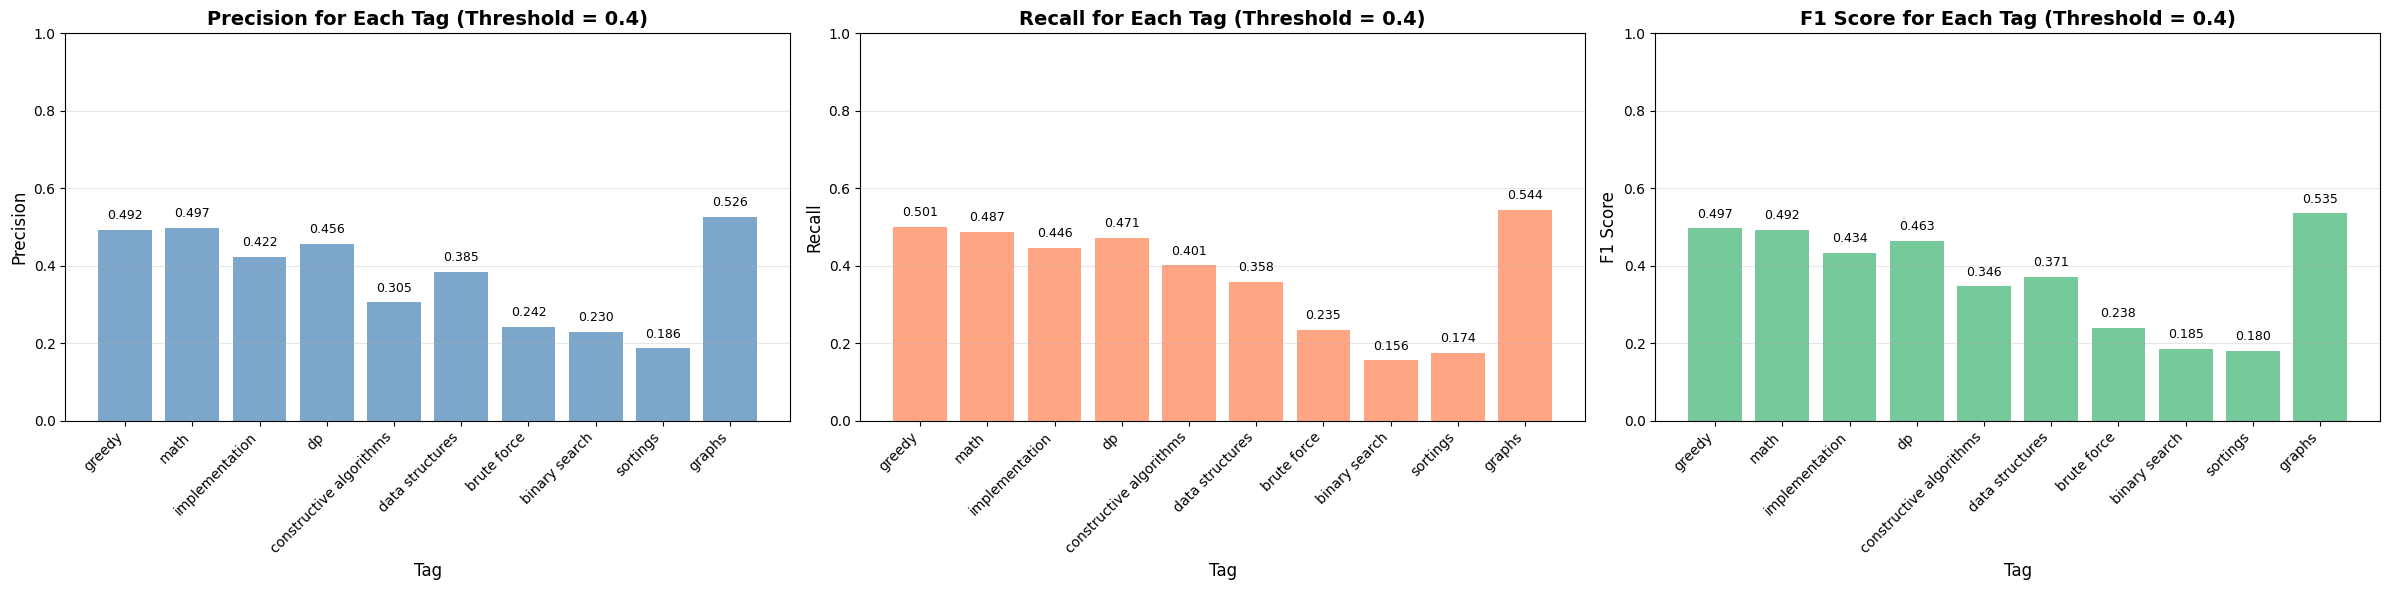


Summary Statistics (Threshold = 0.4):
Tag                       Precision    Recall       F1 Score    
greedy                    0.4922       0.5010       0.4966      
math                      0.4969       0.4868       0.4918      
implementation            0.4221       0.4462       0.4338      
dp                        0.4559       0.4711       0.4634      
constructive algorithms   0.3050       0.4007       0.3464      
data structures           0.3846       0.3585       0.3711      
brute force               0.2422       0.2348       0.2385      
binary search             0.2295       0.1556       0.1854      
sortings                  0.1862       0.1742       0.1800      
graphs                    0.5263       0.5442       0.5351      
Average                   0.3741       0.3773       0.3742      
Std Dev                   0.1182       0.1343       0.1260      


([0.49221789883268485,
  0.4968944099378882,
  0.42207792207792205,
  0.45588235294117646,
  0.3050397877984085,
  0.38461538461538464,
  0.2421875,
  0.22950819672131148,
  0.18620689655172415,
  0.5263157894736842],
 [0.500990099009901,
  0.486815415821501,
  0.4462242562929062,
  0.47112462006079026,
  0.40069686411149824,
  0.3584905660377358,
  0.23484848484848486,
  0.15555555555555556,
  0.17419354838709677,
  0.54421768707483],
 [0.49656526005888124,
  0.4918032786885246,
  0.43381535038932145,
  0.4633781763826607,
  0.3463855421686747,
  0.37109375,
  0.23846153846153847,
  0.18543046357615894,
  0.18,
  0.5351170568561873])

In [ ]:
# Call the function with default threshold of 0.4
plot_metrics(threshold=0.3)


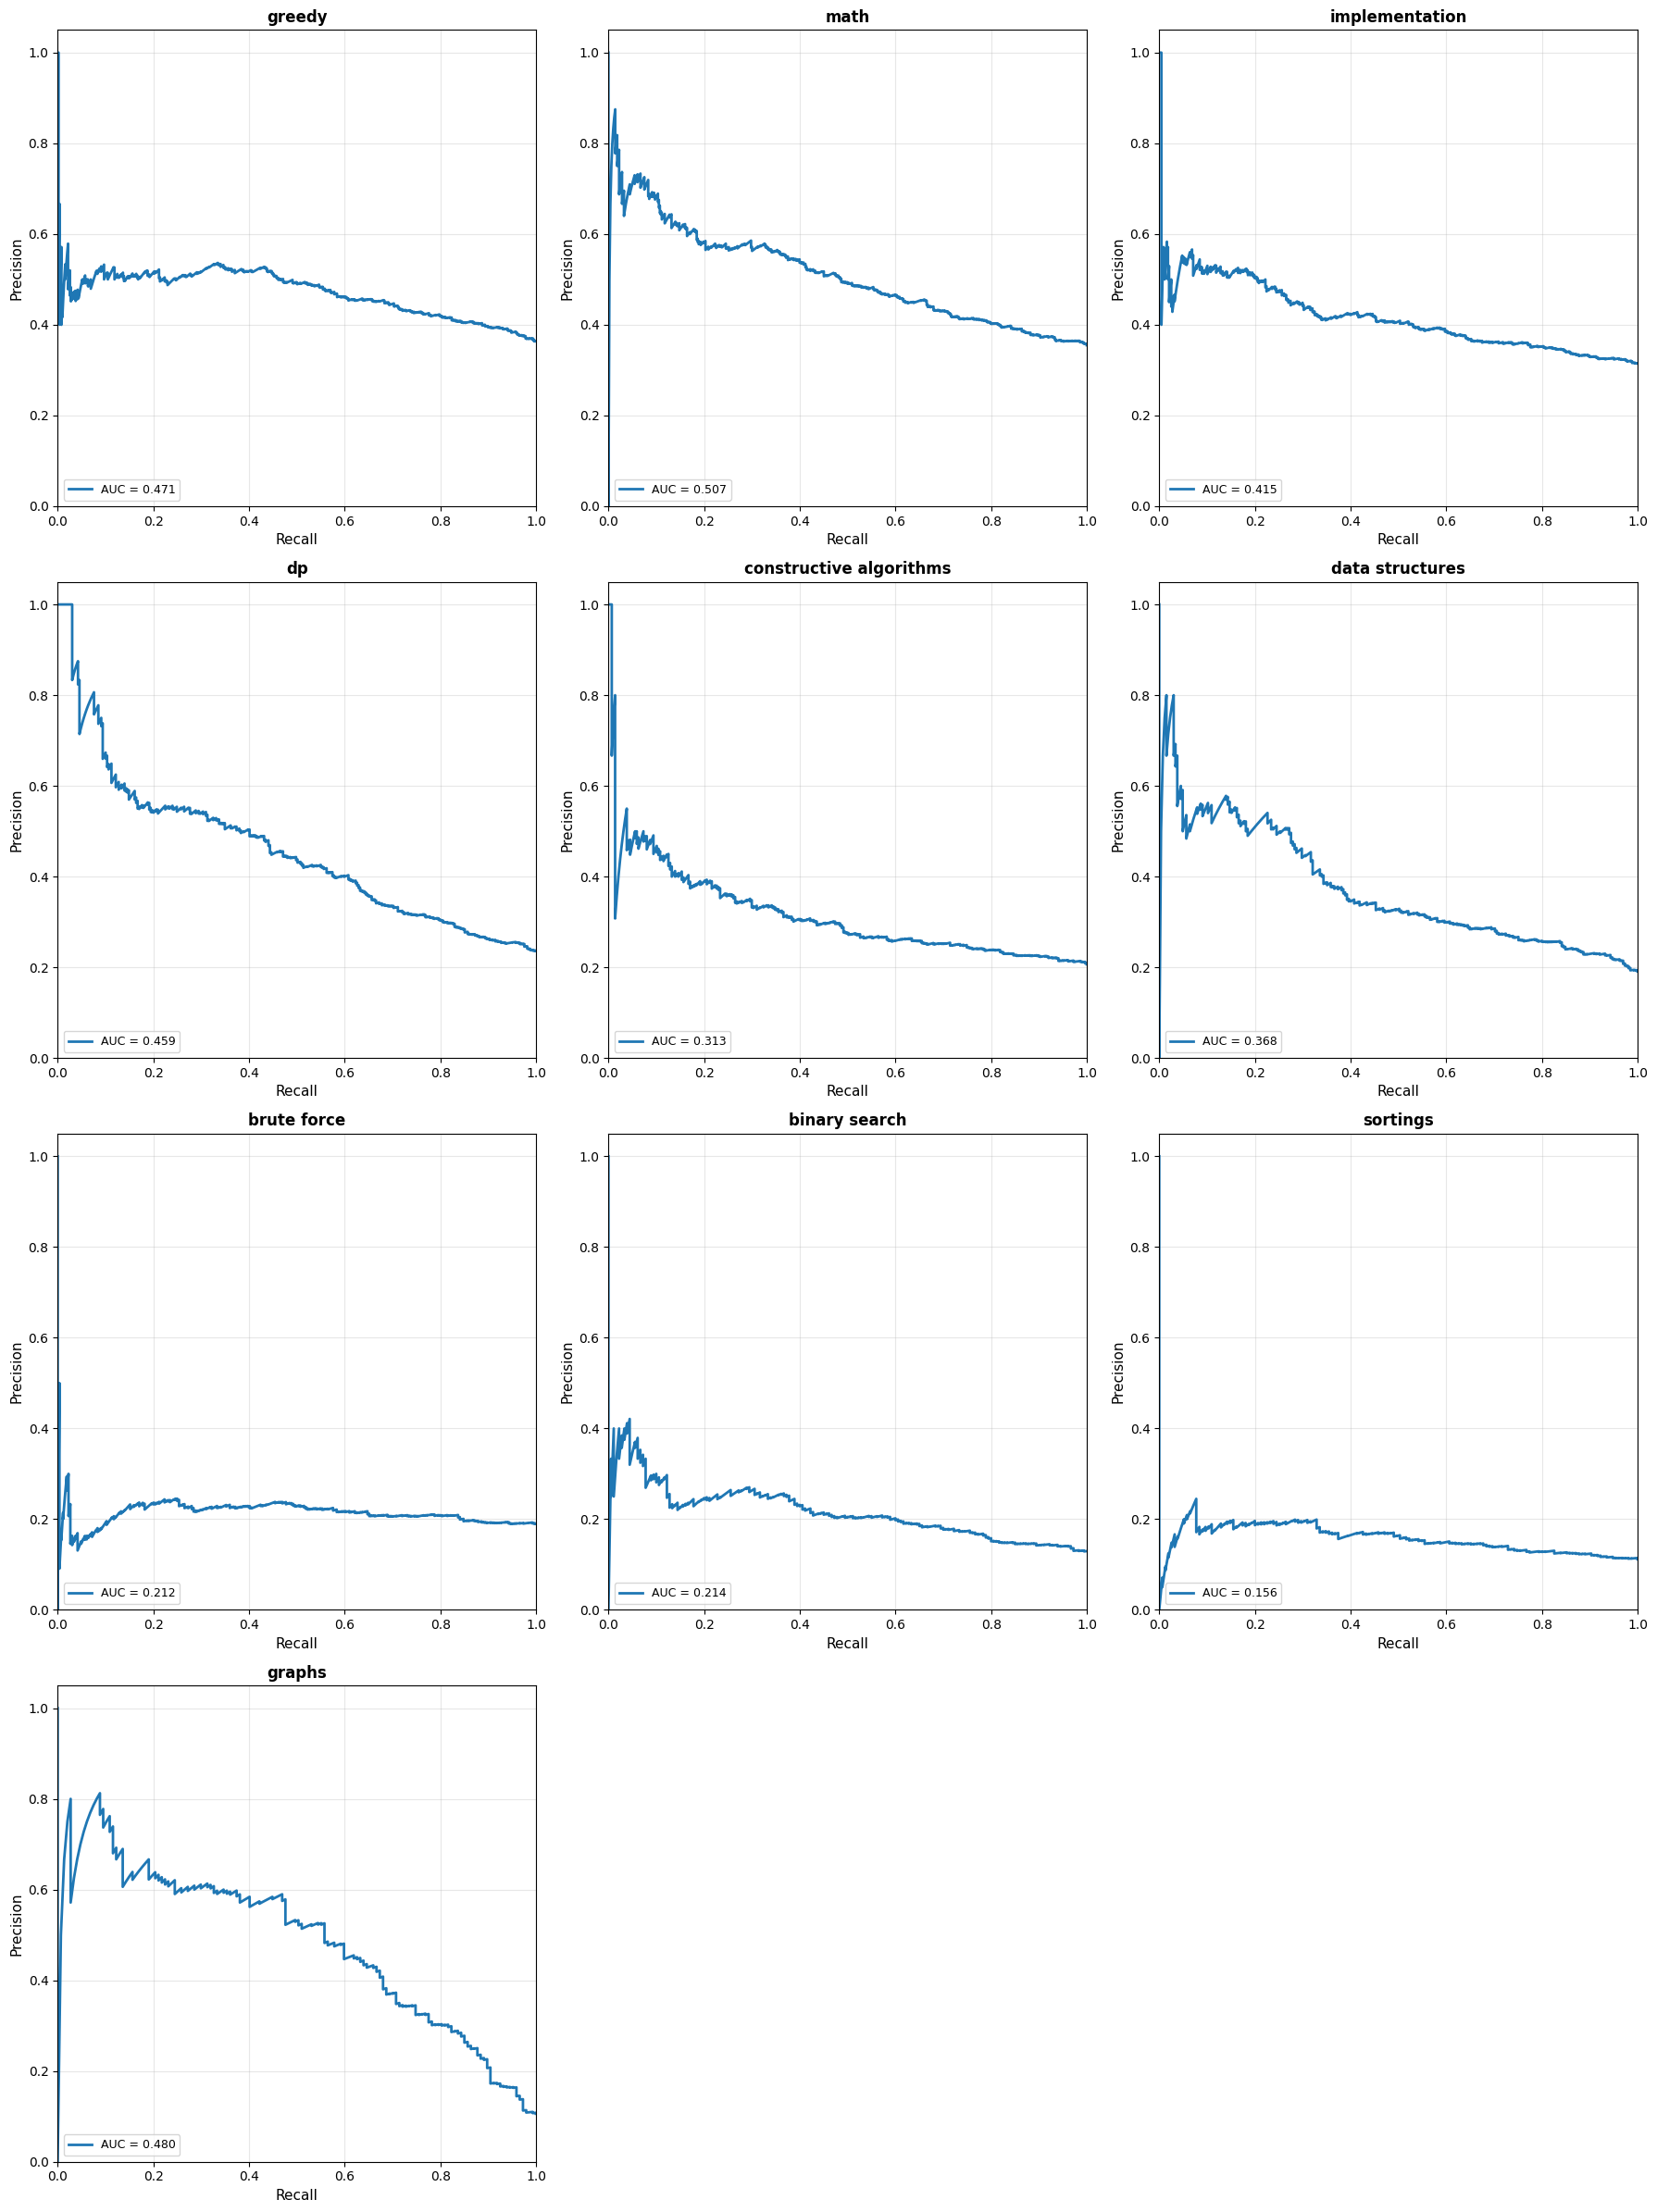


Precision-Recall AUC Summary:
Tag                       PR-AUC      
greedy                    0.4706      
math                      0.5068      
implementation            0.4153      
dp                        0.4586      
constructive algorithms   0.3130      
data structures           0.3683      
brute force               0.2124      
binary search             0.2140      
sortings                  0.1556      
graphs                    0.4796      
Average                   0.3594      
Std Dev                   0.1217      


[0.47063481732051227,
 0.5067960607148441,
 0.4153236349575506,
 0.4585551815617397,
 0.3129547023700781,
 0.3682535297406601,
 0.21244713267940338,
 0.21398952760833154,
 0.15555251783044122,
 0.4796292529940766]

In [101]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_precision_recall_curves():
    """
    Plot precision-recall curves for each class/tag using the test dataframe.
    Shows the trade-off between precision and recall at different thresholds.
    """
    tag_names = target_columns
    n_classes = len(tag_names)
    
    # Create subplots - arrange in a grid
    n_cols = 3
    n_rows = (n_classes + n_cols - 1) // n_cols  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    
    # Flatten axes array for easier indexing
    if n_classes == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Store AUC values for summary
    auc_scores = []
    
    # Plot precision-recall curve for each tag
    for i, tag_name in enumerate(tag_names):
        ax = axes[i]
        
        # Get actual labels (ground truth)
        y_true = test_df_expanded[tag_name].values
        
        # Get predicted probabilities
        y_pred_proba = test_df_expanded[f'predicted_{tag_name}'].values
        
        # Calculate precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
        
        # Calculate AUC (Area Under Curve)
        pr_auc = auc(recall, precision)
        auc_scores.append(pr_auc)
        
        # Plot the curve
        ax.plot(recall, precision, linewidth=2, label=f'AUC = {pr_auc:.3f}')
        ax.set_xlabel('Recall', fontsize=11)
        ax.set_ylabel('Precision', fontsize=11)
        ax.set_title(f'{tag_name}', fontsize=12, fontweight='bold')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.grid(alpha=0.3)
        ax.legend(loc='lower left', fontsize=9)
    
    # Hide unused subplots
    for i in range(n_classes, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nPrecision-Recall AUC Summary:")
    print("=" * 60)
    print(f"{'Tag':<25} {'PR-AUC':<12}")
    print("=" * 60)
    for i, tag_name in enumerate(tag_names):
        print(f"{tag_name:<25} {auc_scores[i]:<12.4f}")
    print("=" * 60)
    print(f"{'Average':<25} {np.mean(auc_scores):<12.4f}")
    print(f"{'Std Dev':<25} {np.std(auc_scores):<12.4f}")
    print("=" * 60)
    
    return auc_scores

# Call the function to plot precision-recall curves
plot_precision_recall_curves()


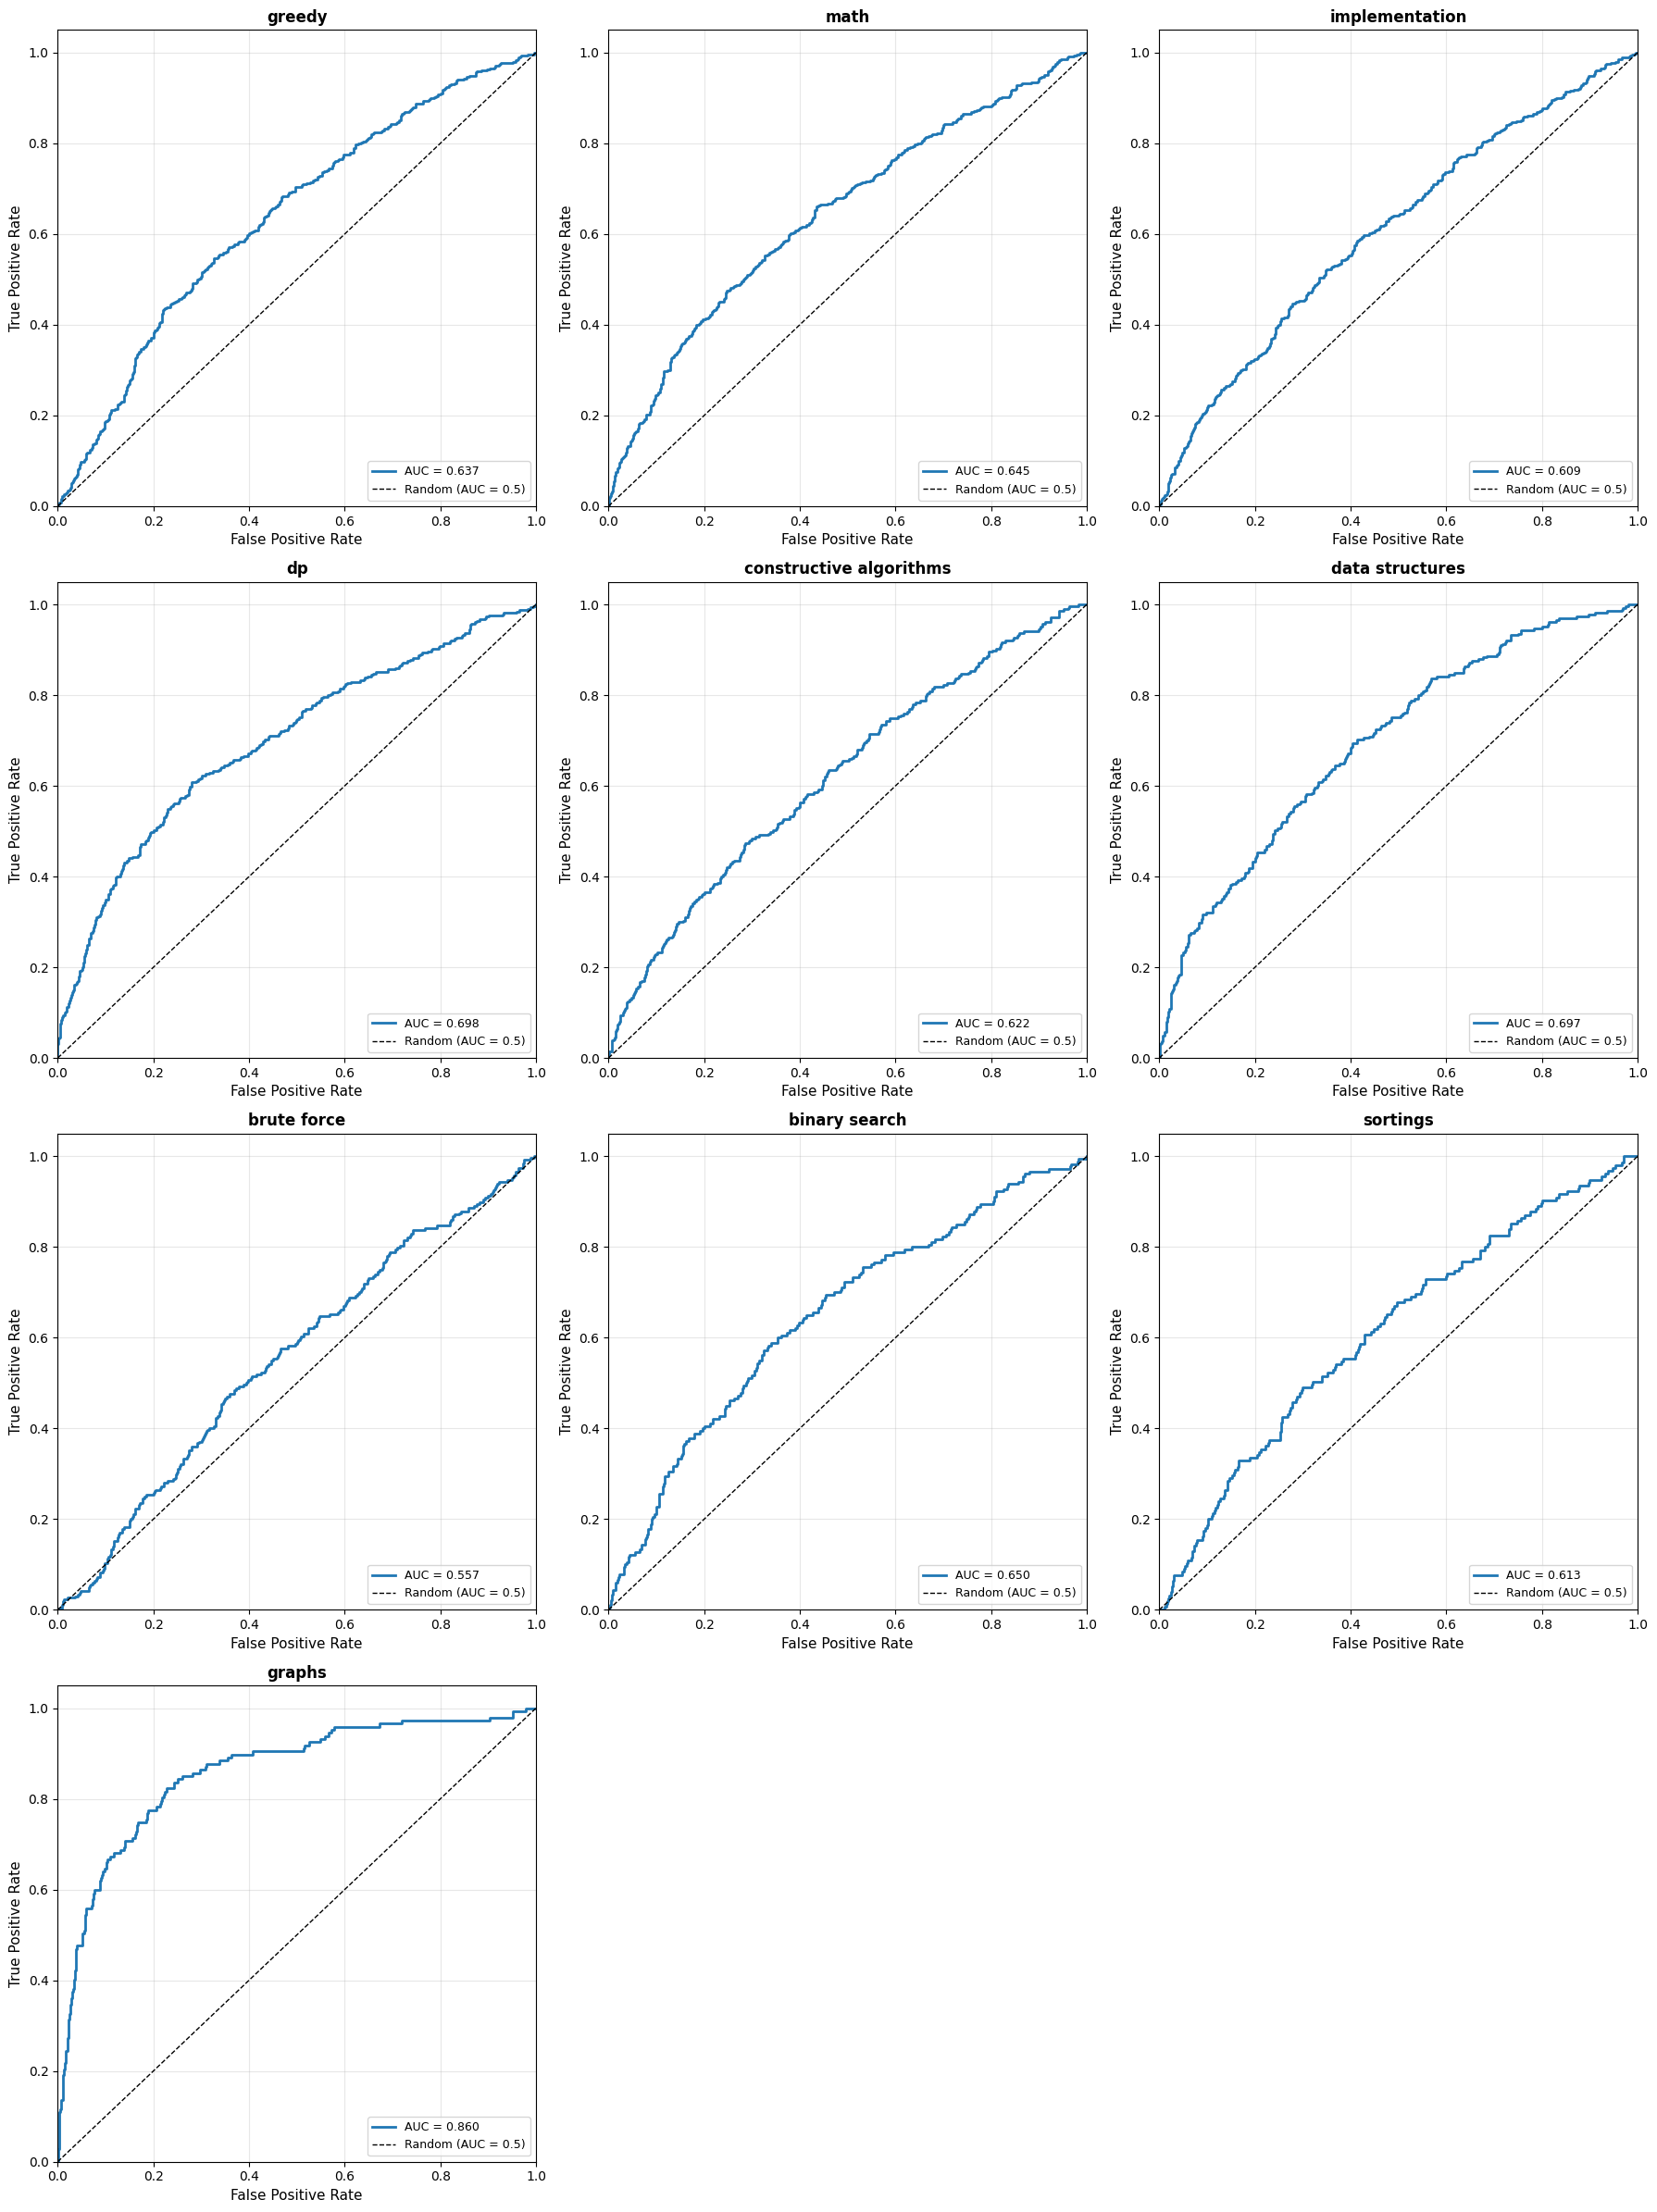


ROC AUC Summary:
Tag                       ROC-AUC     
greedy                    0.6374      
math                      0.6454      
implementation            0.6091      
dp                        0.6978      
constructive algorithms   0.6218      
data structures           0.6974      
brute force               0.5566      
binary search             0.6503      
sortings                  0.6133      
graphs                    0.8597      
Average                   0.6589      
Std Dev                   0.0777      


[0.6373639173872139,
 0.6454333888727904,
 0.6091283195200277,
 0.6978149911108562,
 0.6217646724043076,
 0.6973779628013161,
 0.5565824915824916,
 0.6502527341237019,
 0.61332671093219,
 0.8597007240899581]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curves():
    """
    Plot ROC curves for each class/tag using the test dataframe.
    Shows the trade-off between true positive rate and false positive rate.
    """
    tag_names = target_columns
    n_classes = len(tag_names)
    
    # Create subplots - arrange in a grid
    n_cols = 3
    n_rows = (n_classes + n_cols - 1) // n_cols  # Ceiling division
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    
    # Flatten axes array for easier indexing
    if n_classes == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Store AUC values for summary
    auc_scores = []
    
    # Plot ROC curve for each tag
    for i, tag_name in enumerate(tag_names):
        ax = axes[i]
        
        # Get actual labels (ground truth)
        y_true = test_df_expanded[tag_name].values
        
        # Get predicted probabilities
        y_pred_proba = test_df_expanded[f'predicted_{tag_name}'].values
        
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
        
        # Calculate AUC (Area Under Curve)
        roc_auc = roc_auc_score(y_true, y_pred_proba)
        auc_scores.append(roc_auc)
        
        # Plot the curve
        ax.plot(fpr, tpr, linewidth=2, label=f'AUC = {roc_auc:.3f}')
        # Plot diagonal line (random classifier)
        ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUC = 0.5)')
        ax.set_xlabel('False Positive Rate', fontsize=11)
        ax.set_ylabel('True Positive Rate', fontsize=11)
        ax.set_title(f'{tag_name}', fontsize=12, fontweight='bold')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.grid(alpha=0.3)
        ax.legend(loc='lower right', fontsize=9)
    
    # Hide unused subplots
    for i in range(n_classes, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nROC AUC Summary:")
    print("=" * 60)
    print(f"{'Tag':<25} {'ROC-AUC':<12}")
    print("=" * 60)
    for i, tag_name in enumerate(tag_names):
        print(f"{tag_name:<25} {auc_scores[i]:<12.4f}")
    print("=" * 60)
    print(f"{'Average':<25} {np.mean(auc_scores):<12.4f}")
    print(f"{'Std Dev':<25} {np.std(auc_scores):<12.4f}")
    print("=" * 60)
    
    return auc_scores

# Call the function to plot ROC curves
plot_roc_curves()


/tmp/ipykernel_84565/3562118327.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', n_classes)


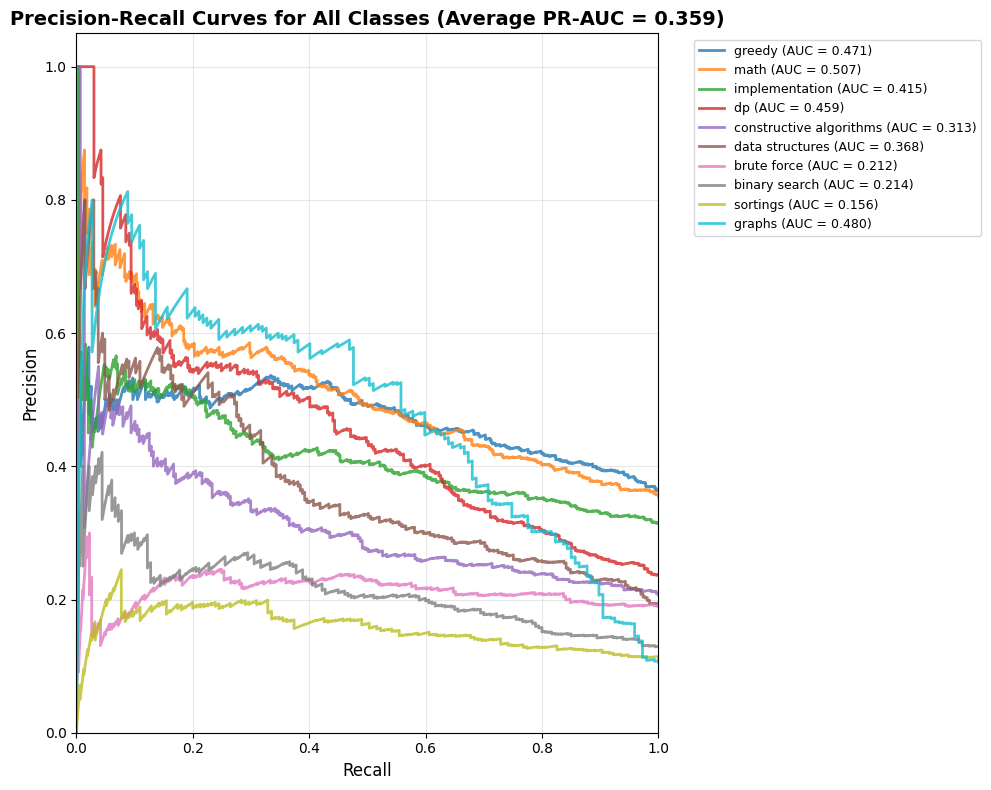


Precision-Recall AUC Summary:
Tag                       PR-AUC      
greedy                    0.4706      
math                      0.5068      
implementation            0.4153      
dp                        0.4586      
constructive algorithms   0.3130      
data structures           0.3683      
brute force               0.2124      
binary search             0.2140      
sortings                  0.1556      
graphs                    0.4796      
Average                   0.3594      
Std Dev                   0.1217      


[0.47063481732051227,
 0.5067960607148441,
 0.4153236349575506,
 0.4585551815617397,
 0.3129547023700781,
 0.3682535297406601,
 0.21244713267940338,
 0.21398952760833154,
 0.15555251783044122,
 0.4796292529940766]

In [103]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def plot_all_pr_curves_combined():
    """
    Plot all precision-recall curves for all classes in a single plot with different colors.
    Shows the average PR-AUC in the title.
    """
    tag_names = target_columns
    n_classes = len(tag_names)
    
    # Create a single figure
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Store AUC values for summary
    auc_scores = []
    
    # Generate a colormap for different colors
    colors = cm.get_cmap('tab10', n_classes)
    
    # Plot precision-recall curve for each tag
    for i, tag_name in enumerate(tag_names):
        # Get actual labels (ground truth)
        y_true = test_df_expanded[tag_name].values
        
        # Get predicted probabilities
        y_pred_proba = test_df_expanded[f'predicted_{tag_name}'].values
        
        # Calculate precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
        
        # Calculate AUC (Area Under Curve)
        pr_auc = auc(recall, precision)
        auc_scores.append(pr_auc)
        
        # Plot the curve with a unique color
        ax.plot(recall, precision, linewidth=2, label=f'{tag_name} (AUC = {pr_auc:.3f})', 
                color=colors(i), alpha=0.8)
    
    # Calculate average PR-AUC
    avg_auc = np.mean(auc_scores)
    
    # Set labels and title
    ax.set_xlabel('Recall', fontsize=12)
    ax.set_ylabel('Precision', fontsize=12)
    ax.set_title(f'Precision-Recall Curves for All Classes (Average PR-AUC = {avg_auc:.3f})', 
                 fontsize=14, fontweight='bold')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.grid(alpha=0.3)
    
    # Add legend (place it outside the plot area)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nPrecision-Recall AUC Summary:")
    print("=" * 60)
    print(f"{'Tag':<25} {'PR-AUC':<12}")
    print("=" * 60)
    for i, tag_name in enumerate(tag_names):
        print(f"{tag_name:<25} {auc_scores[i]:<12.4f}")
    print("=" * 60)
    print(f"{'Average':<25} {avg_auc:<12.4f}")
    print(f"{'Std Dev':<25} {np.std(auc_scores):<12.4f}")
    print("=" * 60)
    
    return auc_scores

# Call the function to plot all PR curves in one plot
plot_all_pr_curves_combined()
